In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the file and displaying top 10 rows
df = pd.read_csv("Data_Analyst_R_Test_Data.csv")
df.head(10)

,Date,Channel,Customer_Type,Revenue,Customer_Count,Gross_Profit,Marketing_Spend
0,1/1/2017,Organic Social,NEW,2802.44,22.0,700.84,201.79
1,1/1/2017,Organic Social,EXISTING,3471.09,25.0,1110.40,249.75
2,1/1/2017,Brand,NEW,81.45,2.0,29.87,717.99
3,1/1/2017,Unidentified,NEW,15465.99,80.0,5291.55,738.66
4,1/1/2017,Brand,EXISTING,180.46,3.0,51.48,1595.63
5,1/1/2017,Unidentified,EXISTING,24834.60,256.0,9558.39,1798.70
6,1/1/2017,Others,EXISTING,14187.90,141.0,4530.53,2868.98
7,1/1/2017,Others,EXISTING,14187.90,141.0,4530.53,2868.98
8,1/1/2017,Others,NEW,17436.84,257.0,5438.96,4084.93
9,1/1/2017,Organic Search,NEW,87085.60,605.0,27992.77,8080.30


In [3]:
# different channels
df['Channel'].unique()

array(['Organic Social', 'Brand', 'Unidentified', 'Others',
       'Organic Search', 'Branded Search', 'Direct', 'Display',
       'Referral', 'Mail', 'Paid Search'], dtype=object)

In [4]:
# Existing customers for unidentified channel
df1 = df[(df['Channel'] == 'Unidentified')]
df2 = df1[df1['Customer_Type'] == 'EXISTING']
df2.tail()

,Date,Channel,Customer_Type,Revenue,Customer_Count,Gross_Profit,Marketing_Spend
1873,3/27/2017,Unidentified,EXISTING,63539.27,446.0,23227.37,6944.08
1894,3/28/2017,Unidentified,EXISTING,43230.28,389.0,16758.67,4668.60
1916,3/29/2017,Unidentified,EXISTING,42505.85,382.0,17601.20,5067.85
1937,3/30/2017,Unidentified,EXISTING,40160.31,360.0,16396.44,3783.62
1959,3/31/2017,Unidentified,EXISTING,37720.46,350.0,14700.88,3614.40


In [5]:
# converting date object to date time format
df2['Date'] =  pd.to_datetime(df2['Date'])

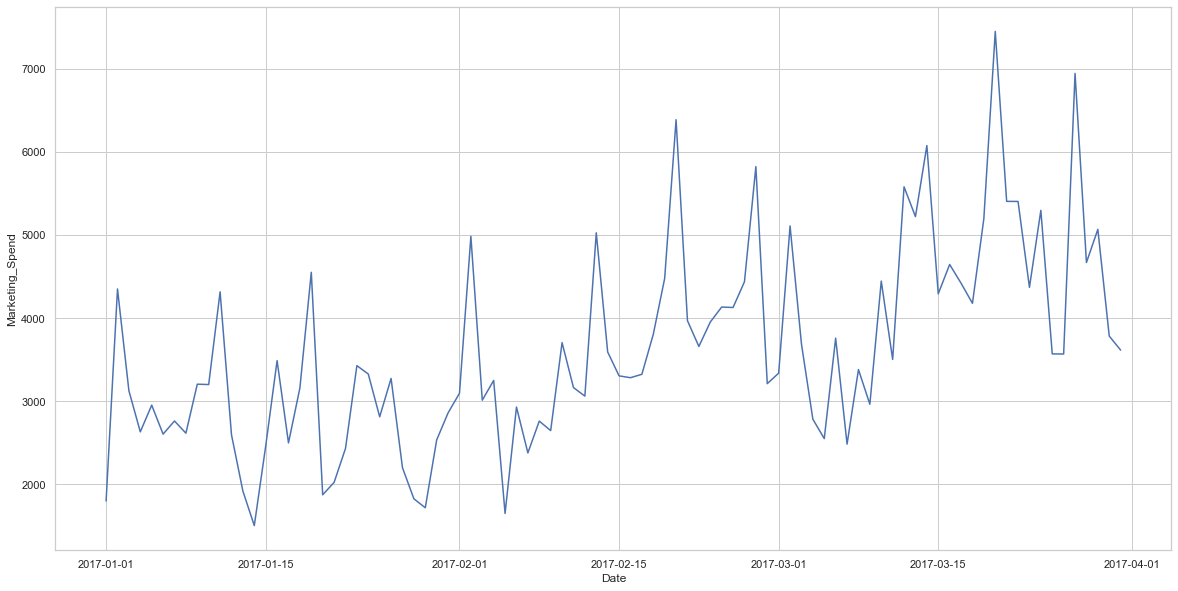

In [6]:
# line plot for amount spend on marketing for existing customers for unidentified channel
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
ax = sns.lineplot(x="Date",y = "Marketing_Spend",data=df2)

In [7]:
# Amount spend on marketing is more in the month on march than the previous months i.e during the end of 90 days cycle
# Amount spend on marketing is less during the start of year 2017
# There is upward trend in marketing spend

In [8]:
# sum of amount spend on existing customers for Unidentified Channel
df2['Marketing_Spend'].sum()

330185.78

In [33]:
# Average amount spend on existing customers for Unidentified Channel
df2['Marketing_Spend'].mean()

3588.9758695652163

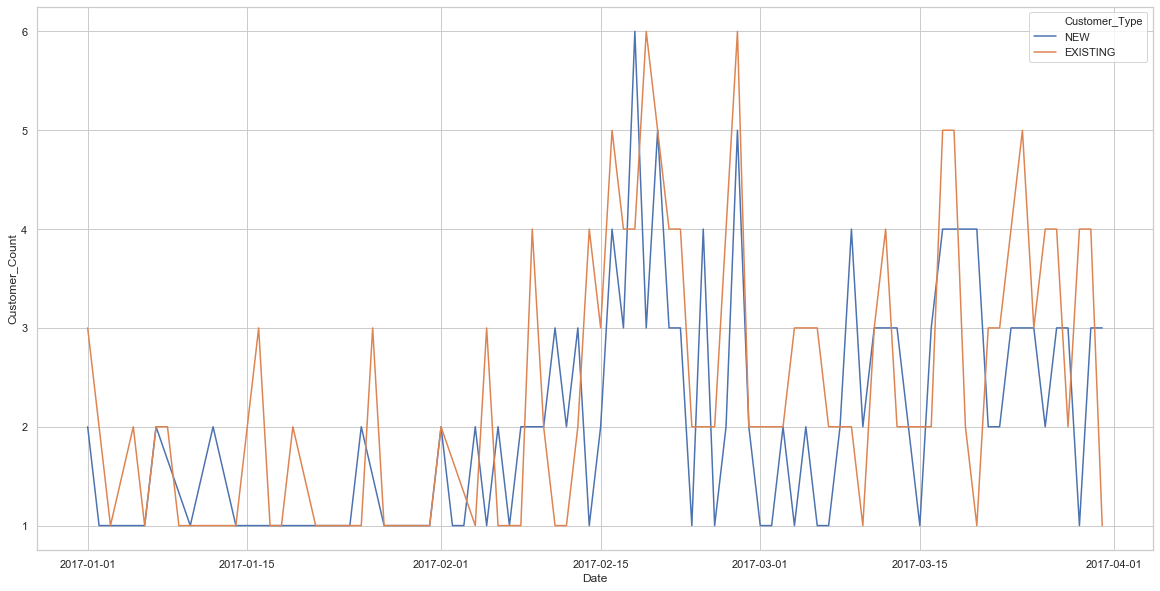

In [10]:
# dataframe for only brand channel
Brand_channel = df[df['Channel'] == 'Brand']
# converting date object to date time format
Brand_channel['Date'] =  pd.to_datetime(Brand_channel['Date'])
# plot for customer count for new and existing for brand channel
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
ax = sns.lineplot(x="Date",y = "Customer_Count", hue = 'Customer_Type',data=Brand_channel)

In [11]:
# New dataframe for customer type
df_new = Brand_channel[Brand_channel['Customer_Type'] == 'NEW']
df_existing = Brand_channel[Brand_channel['Customer_Type'] == 'EXISTING']
full_df = pd.merge(df_new,df_existing,on = ['Date'], how = 'inner')
full_df.head()

,Date,Channel_x,Customer_Type_x,Revenue_x,Customer_Count_x,Gross_Profit_x,Marketing_Spend_x,Channel_y,Customer_Type_y,Revenue_y,Customer_Count_y,Gross_Profit_y,Marketing_Spend_y
0,2017-01-01,Brand,NEW,81.45,2.0,29.87,717.99,Brand,EXISTING,180.46,3.0,51.48,1595.63
1,2017-01-02,Brand,NEW,496.48,1.0,52.66,1791.89,Brand,EXISTING,139.40,2.0,74.09,499.66
2,2017-01-03,Brand,NEW,28.05,1.0,9.67,1580.03,Brand,EXISTING,12.63,1.0,2.65,709.78
3,2017-01-05,Brand,NEW,16.99,1.0,2.47,408.24,Brand,EXISTING,78.20,2.0,30.13,1879.37
4,2017-01-06,Brand,NEW,18.81,1.0,4.63,584.24,Brand,EXISTING,54.60,1.0,23.94,1703.65


In [12]:
# customer count diffrence (new - existing)
diff_cust_count = full_df['Customer_Count_x'] - full_df['Customer_Count_y']
diff_cust_count

0    -1.0
1    -1.0
2     0.0
3    -1.0
4     0.0
     ... 
70   -1.0
71    1.0
72   -3.0
73   -1.0
74    2.0
Length: 75, dtype: float64

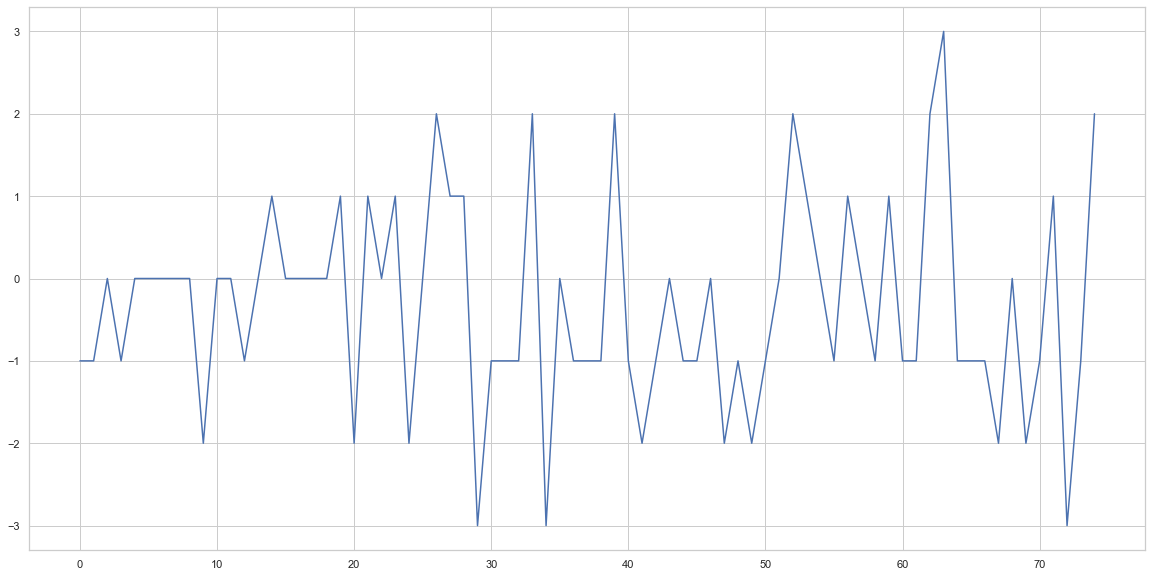

In [13]:
# plot showing customer count difference
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
ax = sns.lineplot(data=diff_cust_count)

In [14]:
# As we see the difference plot of new and existing customers there are more positive points which says that brand channel drives more new customers than existing ones

In [15]:
#Marketing_Contribution = Gross_Profit - Marketing_Spend
df['Marketing_Contribution'] = df['Gross_Profit'] -  df['Marketing_Spend']
df.head()

,Date,Channel,Customer_Type,Revenue,Customer_Count,Gross_Profit,Marketing_Spend,Marketing_Contribution
0,1/1/2017,Organic Social,NEW,2802.44,22.0,700.84,201.79,499.05
1,1/1/2017,Organic Social,EXISTING,3471.09,25.0,1110.40,249.75,860.65
2,1/1/2017,Brand,NEW,81.45,2.0,29.87,717.99,-688.12
3,1/1/2017,Unidentified,NEW,15465.99,80.0,5291.55,738.66,4552.89
4,1/1/2017,Brand,EXISTING,180.46,3.0,51.48,1595.63,-1544.15


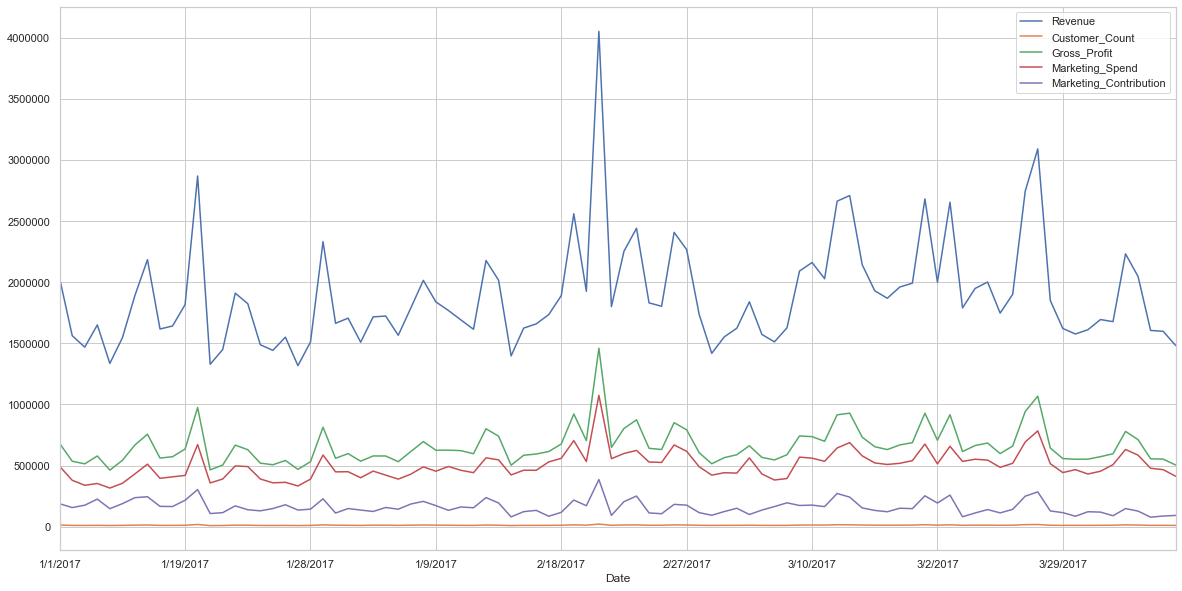

In [16]:
# summarize by grouping on date
agg_level = df.groupby('Date').sum()
agg_level.plot()

In [17]:
agg_level = agg_level.reset_index()

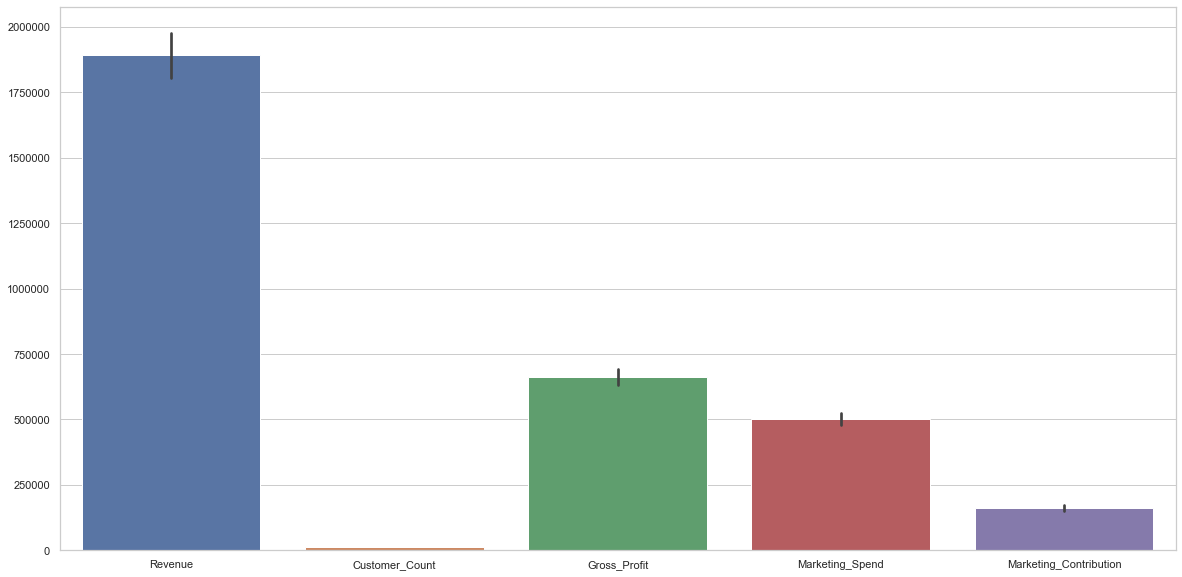

In [18]:
# total for all the columns
ax = sns.barplot(data=agg_level)

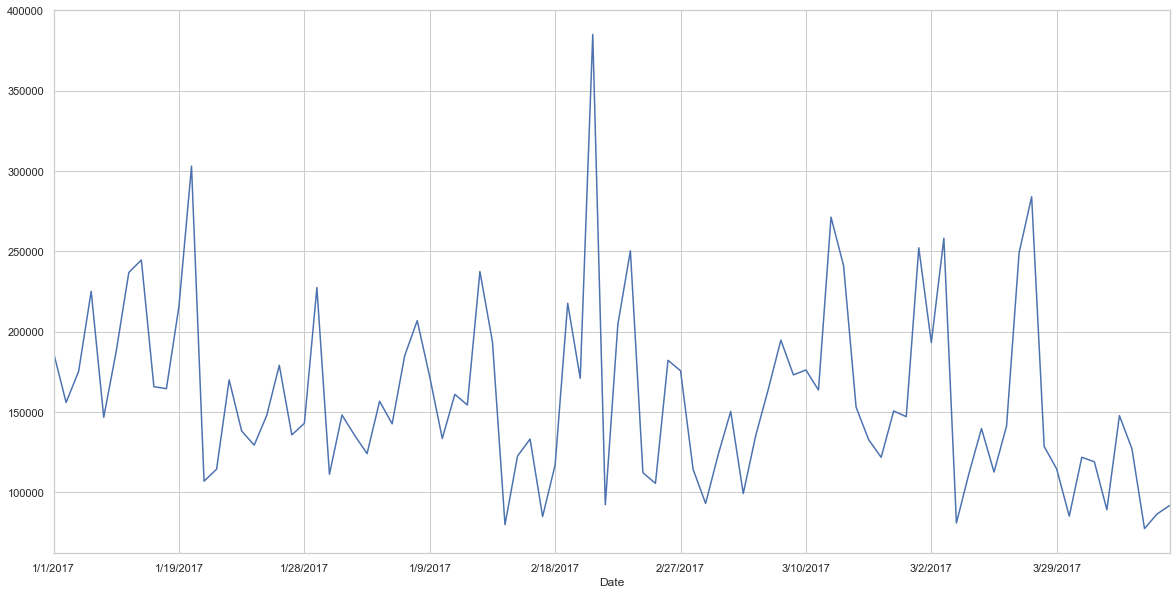

In [19]:
# Marketing contribution for all channels and customer types
fig, ax = plt.subplots()
agg_level.plot(x='Date', y='Marketing_Contribution', ax=ax, legend=False)

In [20]:
# paid search channel
df_paid_search = df[df['Channel'] == 'Paid Search']

# organic search channel
df_organic_search = df[df['Channel'] == 'Organic Search']

In [21]:
print(df_paid_search.shape)
print(df_organic_search.shape)

(180, 8)
(182, 8)


In [27]:
# joining dataframes for equal size data
main_df = pd.merge(df_paid_search,df_organic_search,on = ['Date','Customer_Type'], how = 'inner')
main_df.head()

,Date,Channel_x,Customer_Type,Revenue_x,Customer_Count_x,Gross_Profit_x,Marketing_Spend_x,Marketing_Contribution_x,Channel_y,Revenue_y,Customer_Count_y,Gross_Profit_y,Marketing_Spend_y,Marketing_Contribution_y
0,1/1/2017,Paid Search,NEW,131919.22,1060.0,43099.88,63787.12,-20687.24,Organic Search,87085.60,605.0,27992.77,8080.30,19912.47
1,1/1/2017,Paid Search,EXISTING,172666.32,1254.0,58457.20,83644.91,-25187.71,Organic Search,114467.37,771.0,39251.73,12344.07,26907.66
2,1/2/2017,Paid Search,NEW,192697.63,1470.0,63221.03,89082.56,-25861.53,Organic Search,117233.82,818.0,39549.55,11227.12,28322.43
3,1/2/2017,Paid Search,EXISTING,243675.34,1732.0,82787.03,111588.16,-28801.13,Organic Search,142416.42,972.0,48959.08,15173.13,33785.95
4,1/3/2017,Paid Search,NEW,107916.47,920.0,34659.96,66127.10,-31467.14,Organic Search,70727.77,539.0,24057.05,6525.51,17531.54


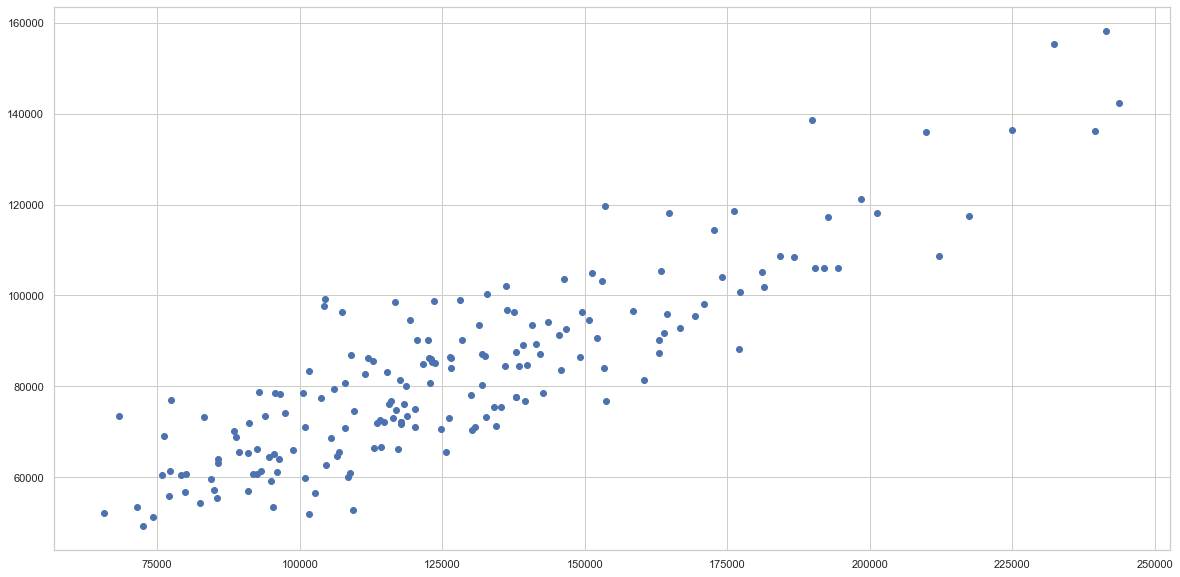

In [28]:
# scatter plot for correlation
plt.scatter(main_df['Revenue_x'], main_df['Revenue_y'])

In [29]:
corr = main_df['Revenue_x'].corr(main_df['Revenue_y'])
corr

0.8760573545565883

In [30]:
# correlation between revenue of paid search and organic search is high